# Notebook Structure

1. Problem Statement and Data Description
2. Loading Datasets and Libraries
3. Understanding and Validating the Data
4. Data Exploration - Train, Product, Store 

# 1. Problem Statement and Data Description

**Problem Statement:** 
objective is to predict the flight prices using that data.

**Data Description:**

Train Data- 
- **Airline** - The name of the airline
- **source** - The date of the journey
- **Destination** - The destination where the service ends.
- **Route** - The route taken by the flight to reach the destination.
- **Dep_Time** - The time when the journey starts from the source
- **Arrival_Time** - Time of arrival at the destination.
- **Duration** - Total duration of the flight.
- **Total_Stops** - Total stops between the source and destination.
- **Additional_Info** - Additional information about the flight
- **Price** - Target, The price of the ticket()

# 2. Loading Required Libraries and Datasets

In [1980]:
import seaborn as sns
import pandas as pd
import numpy as np
import random

sns.set_context('notebook',font_scale=1.5)

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [1981]:
# reading the data files
train = pd.read_csv('train.csv')


In [1982]:
# checking the size of the dataframes
train.shape

(8012, 11)

# 3. Understanding and Validating Data

In [1983]:
# Size od data
train.shape

(8012, 11)

In [1984]:
### Train Data
train.head()

Airline Date_of_Journey    Source Destination            Route Dep_Time  \
0  Airline C      12/06/2019     Delhi      Cochin  DEL → MAA → COK    20:40   
1  Airline A      18/06/2019  Banglore       Delhi        BLR → DEL    18:55   
2  Airline C      18/05/2019     Delhi      Cochin  DEL → BOM → COK    03:50   
3  Airline A       6/05/2019   Kolkata    Banglore  CCU → BOM → BLR    20:00   
4  Airline A       9/05/2019   Kolkata    Banglore  CCU → BOM → BLR    06:30   

   Arrival_Time Duration Total_Stops              Additional_Info  Price  
0  09:25 13 Jun  12h 45m      1 stop                      No info   7480  
1         22:00    3h 5m    non-stop                      No info   8016  
2         19:15  15h 25m      1 stop                      No info   8879  
3  08:15 07 May  12h 15m      1 stop  In-flight meal not included   9663  
4         12:00   5h 30m      1 stop  In-flight meal not included   9663

In [1985]:
# checking datatypes of columns in train file 
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

- Date_of_Journey has the data type object, but its a datetime variable 

#### Datetime variable 

- The date of journey
- Is there any rescheduled date due to delay in take off?

#### Numerical Variables

- Check the distribution of numerical variables
- Are there any extreme values?
- Are there any missing values in the variables?

#### Categorical Variables

- Check the unique values for categorical variables
- Are there any missing values in the variables?
- Is there any variable with high cardinality/ sparsity?


In [1986]:
train.head()

Airline Date_of_Journey    Source Destination            Route Dep_Time  \
0  Airline C      12/06/2019     Delhi      Cochin  DEL → MAA → COK    20:40   
1  Airline A      18/06/2019  Banglore       Delhi        BLR → DEL    18:55   
2  Airline C      18/05/2019     Delhi      Cochin  DEL → BOM → COK    03:50   
3  Airline A       6/05/2019   Kolkata    Banglore  CCU → BOM → BLR    20:00   
4  Airline A       9/05/2019   Kolkata    Banglore  CCU → BOM → BLR    06:30   

   Arrival_Time Duration Total_Stops              Additional_Info  Price  
0  09:25 13 Jun  12h 45m      1 stop                      No info   7480  
1         22:00    3h 5m    non-stop                      No info   8016  
2         19:15  15h 25m      1 stop                      No info   8879  
3  08:15 07 May  12h 15m      1 stop  In-flight meal not included   9663  
4         12:00   5h 30m      1 stop  In-flight meal not included   9663

In [1987]:
train['Airline'].value_counts()

Airline A    2881
Airline B    1550
Airline C    1287
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

In [1988]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1989]:
train.dropna(inplace = True)

In [1990]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [1991]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

##### Date_of_Journey

In [1992]:
# convert into the date time format
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'])

In [1993]:
train['Date_of_Journey'].nunique()

40

In [1994]:
train["Journey_day"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [1995]:
train["Journey_month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [1996]:
train['Date_of_Journey'].dt.day_name().value_counts()

Thursday     1730
Friday       1382
Wednesday    1192
Monday       1127
Tuesday       910
Saturday      905
Sunday        765
Name: Date_of_Journey, dtype: int64

In [1997]:
train['Date_of_Journey'].nunique()

40

In [1998]:
train['Date_of_Journey'].value_counts(sort =True, ascending=False)

2019-06-06    390
2019-05-18    385
2019-09-06    384
2019-12-06    379
2019-09-05    363
2019-05-21    351
2019-03-21    316
2019-05-15    314
2019-06-03    300
2019-05-27    293
2019-06-24    264
2019-06-15    255
2019-06-27    253
2019-01-06    250
2019-03-24    245
2019-03-06    243
2019-09-03    233
2019-03-27    227
2019-05-24    224
2019-03-03    211
2019-12-05    202
2019-01-05    201
2019-06-05    199
2019-01-04    195
2019-01-03    154
2019-03-15    122
2019-03-18    119
2019-12-03    102
2019-09-04     92
2019-06-04     80
2019-06-18     79
2019-03-04     79
2019-06-21     78
2019-04-15     72
2019-04-24     67
2019-03-05     65
2019-04-27     64
2019-04-21     59
2019-04-18     52
2019-12-04     50
Name: Date_of_Journey, dtype: int64

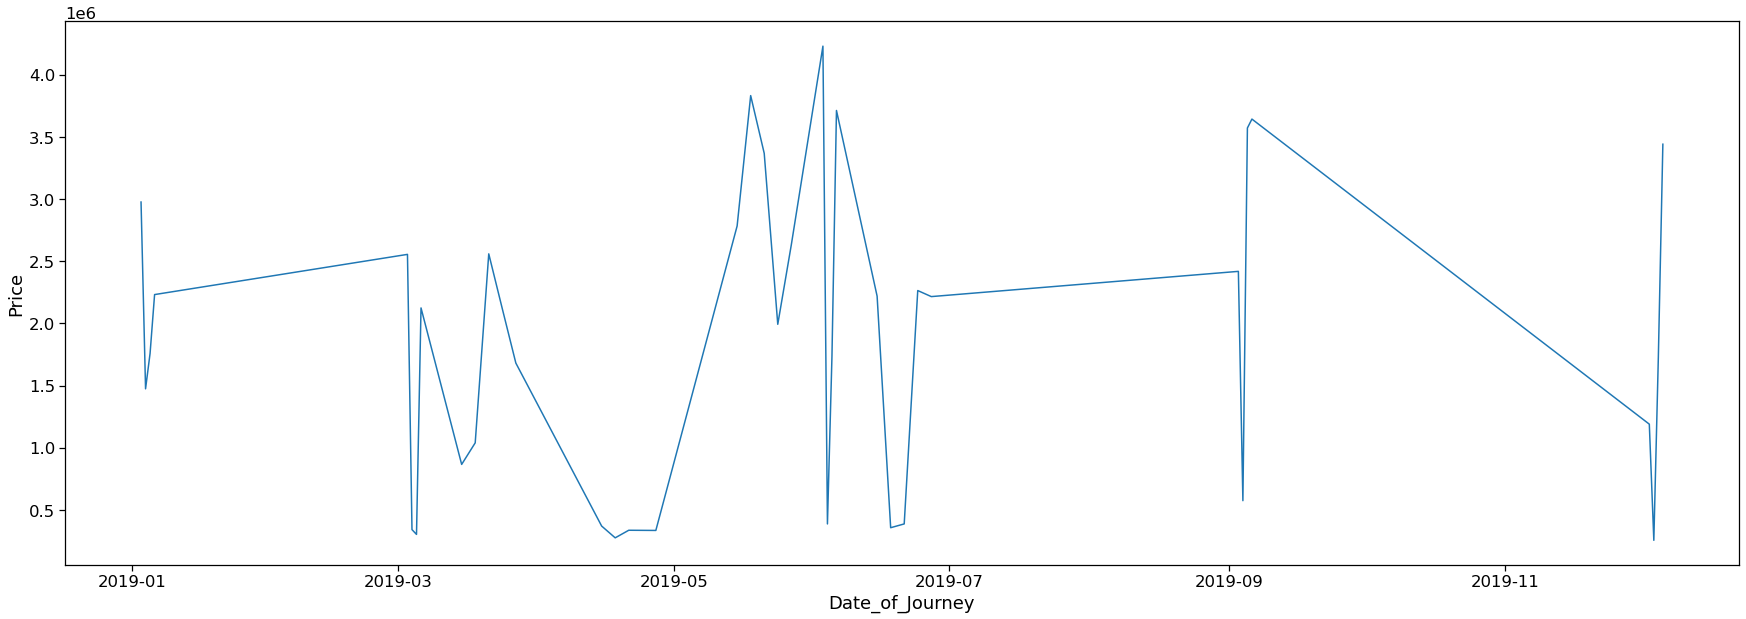

In [1999]:
weekly_demand = train.groupby(['Date_of_Journey'])['Price'].sum()

plt.figure(figsize=(30,10))
sns.lineplot(x = weekly_demand.index, y = weekly_demand)

In [2000]:
train['Journey_month'].nunique()

7

In [2001]:
train['Journey_month'].value_counts(sort =True, ascending=False)

6     1898
3     1627
5     1567
9     1072
1      800
12     733
4      314
Name: Journey_month, dtype: int64

### We have 40 weeks of data for the flight and maximum filghts deoarted on thursday, friday, tuesday and monday in the month Junuary, April, may and october and december

In [2002]:
train["Additional_Info"].value_counts()

No info                         6250
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
No Info                            3
Change airports                    2
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [2003]:
train["Additional_Info"] = train["Additional_Info"].replace({'No Info': 'No info'})

In [2004]:
train.head()

Airline Date_of_Journey    Source Destination            Route Dep_Time  \
0  Airline C      2019-12-06     Delhi      Cochin  DEL → MAA → COK    20:40   
1  Airline A      2019-06-18  Banglore       Delhi        BLR → DEL    18:55   
2  Airline C      2019-05-18     Delhi      Cochin  DEL → BOM → COK    03:50   
3  Airline A      2019-06-05   Kolkata    Banglore  CCU → BOM → BLR    20:00   
4  Airline A      2019-09-05   Kolkata    Banglore  CCU → BOM → BLR    06:30   

   Arrival_Time Duration Total_Stops              Additional_Info  Price  \
0  09:25 13 Jun  12h 45m      1 stop                      No info   7480   
1         22:00    3h 5m    non-stop                      No info   8016   
2         19:15  15h 25m      1 stop                      No info   8879   
3  08:15 07 May  12h 15m      1 stop  In-flight meal not included   9663   
4         12:00   5h 30m      1 stop  In-flight meal not included   9663   

   Journey_day  Journey_month  
0            6             12  
1           18              6  
2           18              5  
3            5              6  
4            5              9

##### Dep_Time

In [2005]:
# convert into the date time format
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'])

In [2006]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour

# Extracting Minutes
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train.drop(["Dep_Time"], axis = 1, inplace = True)

In [2007]:
train.head()

Airline Date_of_Journey    Source Destination            Route  \
0  Airline C      2019-12-06     Delhi      Cochin  DEL → MAA → COK   
1  Airline A      2019-06-18  Banglore       Delhi        BLR → DEL   
2  Airline C      2019-05-18     Delhi      Cochin  DEL → BOM → COK   
3  Airline A      2019-06-05   Kolkata    Banglore  CCU → BOM → BLR   
4  Airline A      2019-09-05   Kolkata    Banglore  CCU → BOM → BLR   

   Arrival_Time Duration Total_Stops              Additional_Info  Price  \
0  09:25 13 Jun  12h 45m      1 stop                      No info   7480   
1         22:00    3h 5m    non-stop                      No info   8016   
2         19:15  15h 25m      1 stop                      No info   8879   
3  08:15 07 May  12h 15m      1 stop  In-flight meal not included   9663   
4         12:00   5h 30m      1 stop  In-flight meal not included   9663   

   Journey_day  Journey_month  Dep_hour  Dep_min  
0            6             12        20       40  
1           18              6        18       55  
2           18              5         3       50  
3            5              6        20        0  
4            5              9         6       30

##### Arrival_Time

In [2008]:
# convert into the date time format
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'])

In [2009]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting Minutes
train["Arrival_min"] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [2010]:
train.head()

Airline Date_of_Journey    Source Destination            Route Duration  \
0  Airline C      2019-12-06     Delhi      Cochin  DEL → MAA → COK  12h 45m   
1  Airline A      2019-06-18  Banglore       Delhi        BLR → DEL    3h 5m   
2  Airline C      2019-05-18     Delhi      Cochin  DEL → BOM → COK  15h 25m   
3  Airline A      2019-06-05   Kolkata    Banglore  CCU → BOM → BLR  12h 15m   
4  Airline A      2019-09-05   Kolkata    Banglore  CCU → BOM → BLR   5h 30m   

  Total_Stops              Additional_Info  Price  Journey_day  Journey_month  \
0      1 stop                      No info   7480            6             12   
1    non-stop                      No info   8016           18              6   
2      1 stop                      No info   8879           18              5   
3      1 stop  In-flight meal not included   9663            5              6   
4      1 stop  In-flight meal not included   9663            5              9   

   Dep_hour  Dep_min  Arrival_hour  Arrival_min  
0        20       40             9           25  
1        18       55            22            0  
2         3       50            19           15  
3        20        0             8           15  
4         6       30            12            0

In [2011]:
train.tail()

Airline Date_of_Journey   Source Destination                  Route  \
8007  Airline A      2019-12-06  Kolkata    Banglore        CCU → BOM → BLR   
8008  Airline C      2019-09-06    Delhi      Cochin  DEL → GOI → BOM → COK   
8009  Airline A      2019-03-03    Delhi      Cochin        DEL → BOM → COK   
8010  Airline A      2019-05-18    Delhi      Cochin        DEL → BOM → COK   
8011  Airline A      2019-09-05  Kolkata    Banglore        CCU → DEL → BLR   

     Duration Total_Stops              Additional_Info  Price  Journey_day  \
8007  22h 10m      1 stop  In-flight meal not included   7594            6   
8008  21h 15m     2 stops                      No info  10651            6   
8009  20h 25m      1 stop                      No info  17024            3   
8010   25h 5m      1 stop  In-flight meal not included  12373           18   
8011  27h 10m      1 stop                      No info  13067            5   

      Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  
8007             12         6       30             4           40  
8008              9        22        0            19           15  
8009              3         8        0             4           25  
8010              5        11       30            12           35  
8011              9        20       25            23           35

In [2012]:
train.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int64
Journey_month               int64
Dep_hour                    int64
Dep_min                     int64
Arrival_hour                int64
Arrival_min                 int64
dtype: object

##### Duration

In [2013]:
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [2014]:
# Adding duration_hours and duration_mins list to train_data dataframe

train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [2015]:
train.head()

Airline Date_of_Journey    Source Destination            Route Duration  \
0  Airline C      2019-12-06     Delhi      Cochin  DEL → MAA → COK  12h 45m   
1  Airline A      2019-06-18  Banglore       Delhi        BLR → DEL    3h 5m   
2  Airline C      2019-05-18     Delhi      Cochin  DEL → BOM → COK  15h 25m   
3  Airline A      2019-06-05   Kolkata    Banglore  CCU → BOM → BLR  12h 15m   
4  Airline A      2019-09-05   Kolkata    Banglore  CCU → BOM → BLR   5h 30m   

  Total_Stops              Additional_Info  Price  Journey_day  Journey_month  \
0      1 stop                      No info   7480            6             12   
1    non-stop                      No info   8016           18              6   
2      1 stop                      No info   8879           18              5   
3      1 stop  In-flight meal not included   9663            5              6   
4      1 stop  In-flight meal not included   9663            5              9   

   Dep_hour  Dep_min  Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0        20       40             9           25              12             45  
1        18       55            22            0               3              5  
2         3       50            19           15              15             25  
3        20        0             8           15              12             15  
4         6       30            12            0               5             30

##### Price

In [2016]:
train['Price'].describe()

count     8011.000000
mean      9062.235426
std       4626.848090
min       1759.000000
25%       5277.000000
50%       8371.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

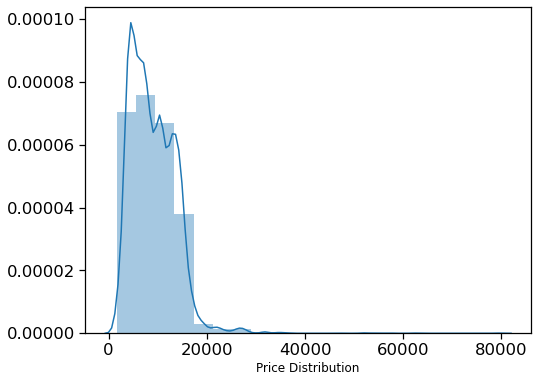

In [2017]:
# distribution of Base Price variable
plt.figure(figsize=(8,6))
sns.distplot((train['Price'].values), bins=20, kde=True)
plt.xlabel('Price Distribution', fontsize=12)
plt.show()

- Range for base price is 4000  to 10000

In [2018]:
train['Price'].value_counts()

10262    197
10844    168
7229     126
4804     110
4823      96
        ... 
10366      1
12648      1
6481       1
6477       1
4098       1
Name: Price, Length: 1632, dtype: int64

#### Categorical Variables

- Check the unique values for categorical variables
- Are there any missing values in the variables?
- Is there any variable with high cardinality/ sparsity?

In [2019]:
train["Airline"].value_counts()

Airline A    2881
Airline B    1550
Airline C    1286
Airline D     906
Airline E     625
Airline F     360
Airline G     235
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

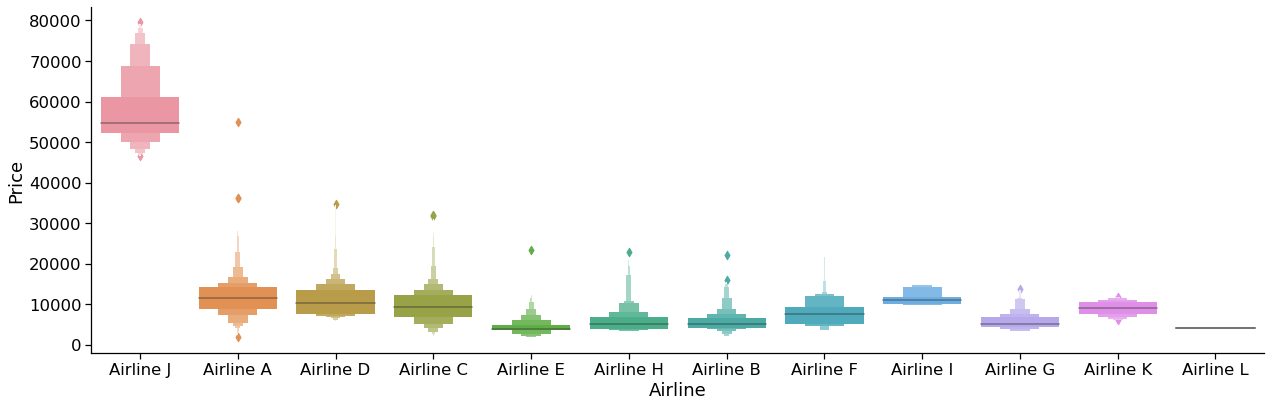

In [2020]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [2021]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Airline_Airline B  Airline_Airline C  Airline_Airline D  Airline_Airline E  \
0                  0                  1                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline F  Airline_Airline G  Airline_Airline H  Airline_Airline I  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline J  Airline_Airline K  Airline_Airline L  
0                  0                  0                  0  
1                  0                  0                  0  
2                  0                  0                  0  
3                  0                  0                  0  
4                  0                  0                  0

- From graph we can see that Airline J has the highest Price.

##### Source

In [2022]:
train["Source"].value_counts()

Delhi       3397
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64

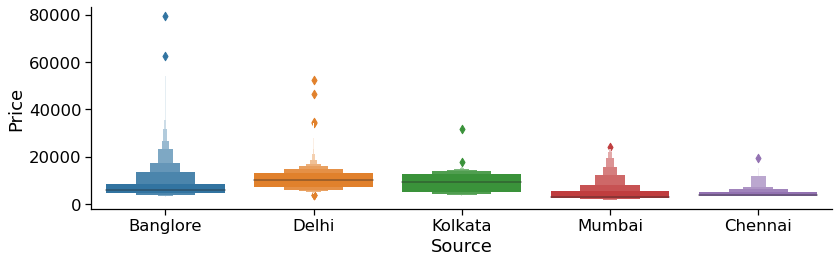

In [2023]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [2024]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             1               0              0
1               0             0               0              0
2               0             1               0              0
3               0             0               1              0
4               0             0               1              0

##### Destination

In [2025]:
train["Destination"].value_counts()

Cochin       3397
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

In [2026]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   1                  0                      0   
1                   0                  1                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0

In [2027]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

##### Total_Stops

In [2028]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [2029]:
train.head()

Airline Date_of_Journey    Source Destination            Route Duration  \
0  Airline C      2019-12-06     Delhi      Cochin  DEL → MAA → COK  12h 45m   
1  Airline A      2019-06-18  Banglore       Delhi        BLR → DEL    3h 5m   
2  Airline C      2019-05-18     Delhi      Cochin  DEL → BOM → COK  15h 25m   
3  Airline A      2019-06-05   Kolkata    Banglore  CCU → BOM → BLR  12h 15m   
4  Airline A      2019-09-05   Kolkata    Banglore  CCU → BOM → BLR   5h 30m   

   Total_Stops              Additional_Info  Price  Journey_day  \
0            1                      No info   7480            6   
1            0                      No info   8016           18   
2            1                      No info   8879           18   
3            1  In-flight meal not included   9663            5   
4            1  In-flight meal not included   9663            5   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0             12        20       40             9           25   
1              6        18       55            22            0   
2              5         3       50            19           15   
3              6        20        0             8           15   
4              9         6       30            12            0   

   Duration_hours  Duration_mins  
0              12             45  
1               3              5  
2              15             25  
3              12             15  
4               5             30

In [2030]:
(train.groupby(['Total_Stops', 'Duration_hours'])['Airline'].count())

Total_Stops  Duration_hours
0            1                  468
             2                 1802
             3                  360
1            3                   22
             4                  170
                               ... 
3            26                   1
             27                   1
             30                   2
             35                   3
             38                  10
Name: Airline, Length: 81, dtype: int64

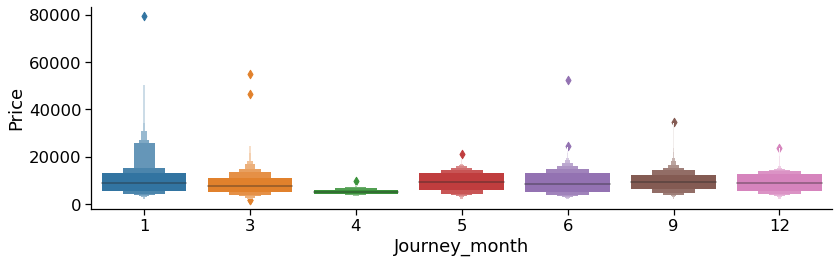

In [2031]:
# Dep Time vs Price

sns.catplot(y = 'Price', x = 'Journey_month', data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [2032]:
train['Total_Stops'].value_counts()

1    4235
0    2630
2    1112
3      34
Name: Total_Stops, dtype: int64

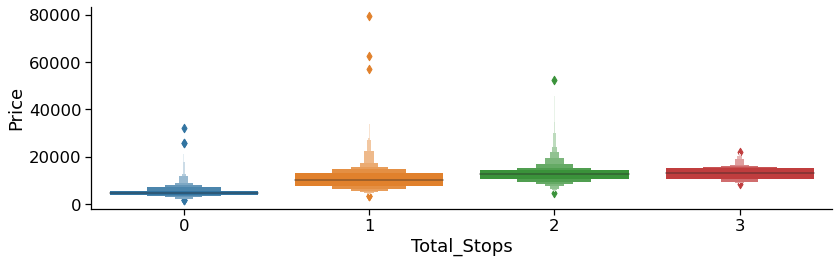

In [2033]:
# Total_Stops vs Price

sns.catplot(y = 'Price', x = 'Total_Stops', data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [2034]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins'],
      dtype='object')

In [2035]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([Airline,train,Source, Destination], axis = 1)

In [2036]:
data_train.head()

Airline_Airline B  Airline_Airline C  Airline_Airline D  Airline_Airline E  \
0                  0                  1                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline F  Airline_Airline G  Airline_Airline H  Airline_Airline I  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline J  Airline_Airline K  ...  Duration_mins Source_Chennai  \
0                  0                  0  ...             45              0   
1                  0                  0  ...              5              0   
2                  0                  0  ...             25              0   
3                  0                  0  ...             15              0   
4                  0                  0  ...             30              0   

  Source_Delhi Source_Kolkata Source_Mumbai Destination_Cochin  \
0            1              0             0                  1   
1            0              0             0                  0   
2            1              0             0                  1   
3            0              1             0                  0   
4            0              1             0                  0   

  Destination_Delhi  Destination_Hyderabad Destination_Kolkata  \
0                 0                      0                   0   
1                 1                      0                   0   
2                 0                      0                   0   
3                 0                      0                   0   
4                 0                      0                   0   

   Destination_New Delhi  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 37 columns]

In [2037]:
data_train['Journey_month'].value_counts()

6     1898
3     1627
5     1567
9     1072
1      800
12     733
4      314
Name: Journey_month, dtype: int64

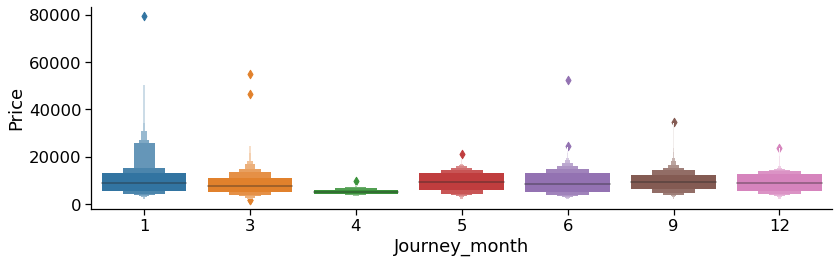

In [2038]:
# Journey_month vs Price

sns.catplot(y = 'Price', x = 'Journey_month', data = train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [2039]:
data_train['Additional_Info'].value_counts()

No info                         6253
In-flight meal not included     1492
No check-in baggage included     249
1 Long layover                     9
Business class                     3
Change airports                    2
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [2040]:
data_train.columns

Index(['Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Airline_Airline J',
       'Airline_Airline K', 'Airline_Airline L', 'Airline', 'Date_of_Journey',
       'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

### Remove unnecessary coloumns

- 1. Route and Total stops contains same information, so we will remove Route feature
- 2. Additional_Info contains almost 80% no_info
- 3. we will delete Airline, Source, Destination as we created its dummy variables.
- 4. as we created duration_hours and duration_mins list to train_data dataframe, we will remove Duration feature too


In [2041]:
data_train.drop(["Route", "Additional_Info", "Airline", "Source", "Destination", "Duration","Date_of_Journey" ], axis = 1, inplace = True)

In [2042]:
data_train.head()

Airline_Airline B  Airline_Airline C  Airline_Airline D  Airline_Airline E  \
0                  0                  1                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline F  Airline_Airline G  Airline_Airline H  Airline_Airline I  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline J  Airline_Airline K  ...  Duration_mins  Source_Chennai  \
0                  0                  0  ...             45               0   
1                  0                  0  ...              5               0   
2                  0                  0  ...             25               0   
3                  0                  0  ...             15               0   
4                  0                  0  ...             30               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             1               0              0                   1   
1             0               0              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               1              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  1                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 30 columns]

# Test Data

In [2043]:
test_data = pd.read_csv('test.csv')

In [2044]:
test_data.shape

(2671, 10)

In [2045]:
test_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0  Airline B      27-03-2019     Delhi      Cochin        DEL → HYD → COK   
1  Airline E      27-05-2019   Kolkata    Banglore              CCU → BLR   
2  Airline C      06-06-2019   Kolkata    Banglore  CCU → IXR → DEL → BLR   
3  Airline A      06-03-2019  Banglore   New Delhi        BLR → MAA → DEL   
4  Airline B      15-06-2019     Delhi      Cochin        DEL → BOM → COK   

  Dep_Time      Arrival_Time Duration Total_Stops Additional_Info  
0    04:55             16:10  11h 15m      1 stop         No info  
1    22:20  28-05-2020 00:40   2h 20m    non-stop         No info  
2    05:50             20:25  14h 35m     2 stops         No info  
3    09:45             14:25   4h 40m      1 stop         No info  
4    16:00  16-06-2020 01:30   9h 30m      1 stop         No info

In [2046]:
# Preprocessing same as training data that we have done

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data['Date_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'])
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [2047]:
test_data.head()

Airline    Source Destination  Total_Stops  Journey_day  Journey_month  \
0  Airline B     Delhi      Cochin            1           27              3   
1  Airline E   Kolkata    Banglore            0           27              5   
2  Airline C   Kolkata    Banglore            2            6              6   
3  Airline A  Banglore   New Delhi            1            3              6   
4  Airline B     Delhi      Cochin            1           15              6   

   Dep_hour  Dep_min  Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0         4       55            16           10              11             15  
1        22       20             0           40               2             20  
2         5       50            20           25              14             35  
3         9       45            14           25               4             40  
4        16        0             1           30               9             30

In [2048]:
data_train.head()

Airline_Airline B  Airline_Airline C  Airline_Airline D  Airline_Airline E  \
0                  0                  1                  0                  0   
1                  0                  0                  0                  0   
2                  0                  1                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline F  Airline_Airline G  Airline_Airline H  Airline_Airline I  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Airline_Airline J  Airline_Airline K  ...  Duration_mins  Source_Chennai  \
0                  0                  0  ...             45               0   
1                  0                  0  ...              5               0   
2                  0                  0  ...             25               0   
3                  0                  0  ...             15               0   
4                  0                  0  ...             30               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             1               0              0                   1   
1             0               0              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               1              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  1                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 30 columns]

In [2049]:
data_train.columns

Index(['Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Airline_Airline J',
       'Airline_Airline K', 'Airline_Airline L', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

# Training data

In [2050]:
X = data_train.loc[:, ['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Airline B', 'Airline_Airline C',
       'Airline_Airline D', 'Airline_Airline E', 'Airline_Airline F',
       'Airline_Airline G', 'Airline_Airline H', 'Airline_Airline I',
       'Airline_Airline J', 'Airline_Airline K', 'Airline_Airline L',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            1   7480            6             12        20       40   
1            0   8016           18              6        18       55   
2            1   8879           18              5         3       50   
3            1   9663            5              6        20        0   
4            1   9663            5              9         6       30   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  ...  \
0             9           25              12             45  ...   
1            22            0               3              5  ...   
2            19           15              15             25  ...   
3             8           15              12             15  ...   
4            12            0               5             30  ...   

   Airline_Airline L  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                  0               0             1               0   
1                  0               0             0               0   
2                  0               0             1               0   
3                  0               0             0               1   
4                  0               0             0               1   

   Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0              0                   1                  0   
1              0                   0                  1   
2              0                   1                  0   
3              0                   0                  0   
4              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      0  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      0  

[5 rows x 30 columns]

In [2051]:
y = data_train.iloc[:, 1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Airline_Airline C, dtype: uint8

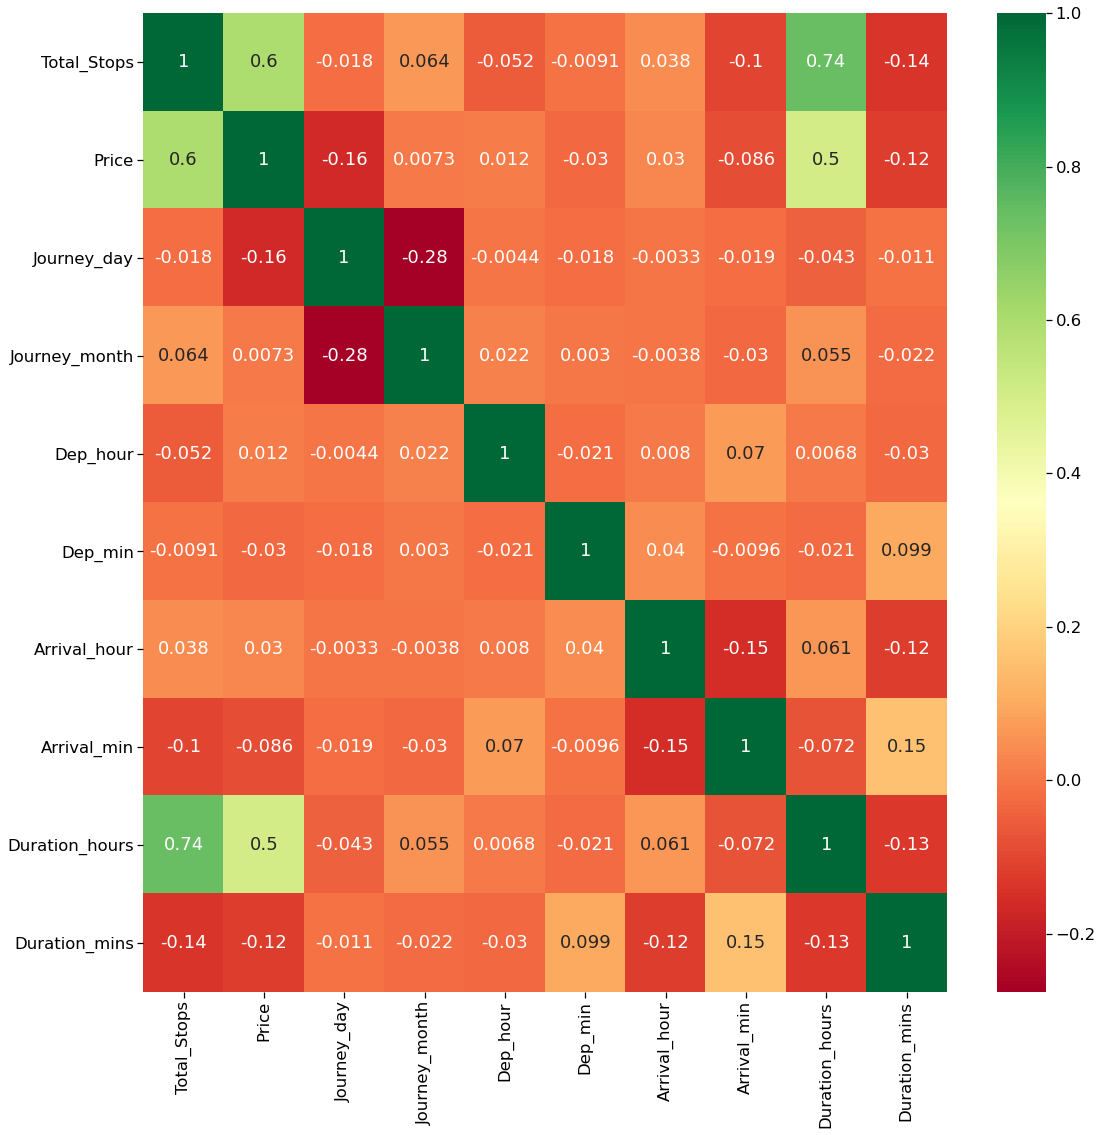

In [2052]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [2053]:
import sklearn 

In [2054]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [2055]:
print(selection.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


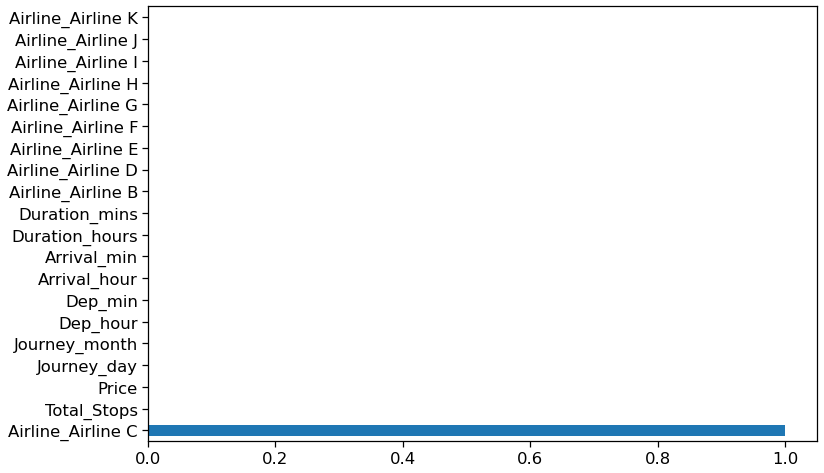

In [2056]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [2057]:
train.to_csv('train_new.csv', index=False)
data_train.to_csv('final_data_train.csv', index=False)
test_data.to_csv('test_data.csv', index=False)